# Intro

This plots the voxel time series

### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib

from glob import glob
from os.path import join

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Settings

In [6]:
nii = "/Volumes/group/PANLab_Datasets/ENGAGE_2/data/ENG000080/2MO_data_archive/100_fMRI/101_fMRI_preproc_GO_NO_GO/wa01_normalized_func_data.nii.gz"
image = nib.load(nii)
data = image.get_data()

### Helper functions

In [25]:
def _find_midpoint(data):
    """ Gets the midpoint coordinates of brain data """
    shape = data.shape
    x_mid = shape[0] // 2
    y_mid = shape[1] // 2
    z_mid = shape[2] // 2
    return (x_mid, y_mid, z_mid)

def _plot(data, coords=None, TR=2, figsize=None):
    ### Set coords if necessary
    if coords is None:
        coords = _find_midpoint(data)
    
    ### Styling
    if figsize is None:
        figsize = (14, 8)
    plt.figure(figsize=figsize)
    
    ### Labeling
    coords_str = "x=%d, y=%d, z=%d" % (coords[0], coords[1], coords[2])
    plt.title("BOLD signal over time for " + coords_str)
    plt.xlabel("Time point (Seconds)")
    plt.ylabel("BOLD signal")
    
    ### Plotting
    x = list(range(data.shape[3]))
    x = [TR * elem for elem in x]
    y = data[coords[0], coords[1], coords[2], :]
    plt.plot(x, y)
    plt.show();

### Sample different voxels

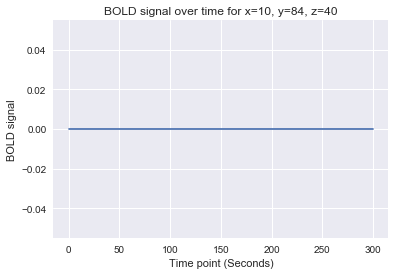

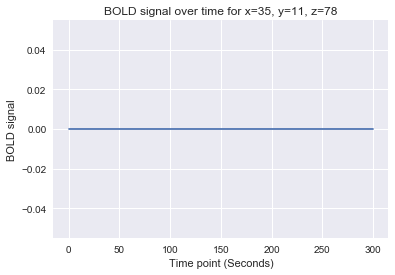

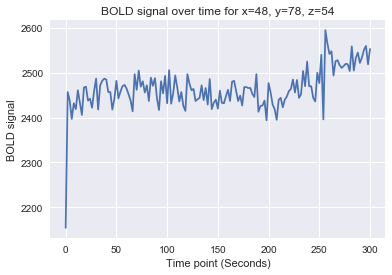

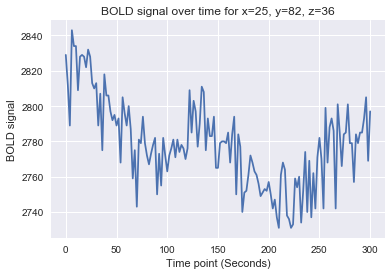

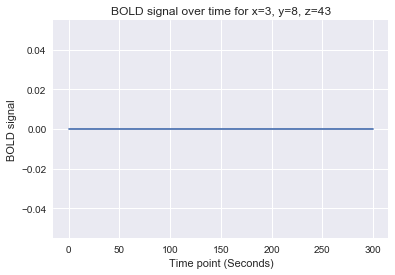

In [27]:
num_runs = 5

for _ in range(num_runs):
    figsize = (6, 4)
    x = np.random.randint(0, data.shape[0])
    y = np.random.randint(0, data.shape[1])
    z = np.random.randint(0, data.shape[2])
    _plot(data, coords=(x, y, z), figsize=figsize)